<a href="https://colab.research.google.com/github/mcova100-jpg/Machine_Learning/blob/main/Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving BostonCities.csv to BostonCities (1).csv
Shape: (141, 11)
Columns: ['City', 'OVERALL SCORE', 'PERCENTILE RANKING', 'Housing', 'Safety', 'Mobility', 'Health', 'Entertainment', 'Diversity', 'Education', 'Employment']

Dtypes:
 City                   object
OVERALL SCORE         float64
PERCENTILE RANKING    float64
Housing               float64
Safety                float64
Mobility              float64
Health                float64
Entertainment         float64
Diversity             float64
Education             float64
Employment            float64
dtype: object

Missing values:
 City                  0
OVERALL SCORE         0
PERCENTILE RANKING    0
Housing               0
Safety                0
Mobility              0
Health                0
Entertainment         0
Diversity             0
Education             0
Employment            0
dtype: int64

Duplicate cities: 0

Numeric summary:
                     count      mean       std   min   25%   50%   75%    max
OVERALL SCOR

,City,OVERALL SCORE,PERCENTILE RANKING,Housing,Safety,Mobility,Health,Entertainment,Diversity,Education,Employment
0,Cambridge,7.31,10.00,6.5,0.4,9.3,8.1,9.5,9.4,8.0,6.1
1,Wellesley,7.30,9.93,8.8,8.7,3.5,6.7,6.6,6.9,9.0,6.6
2,Brookline,7.16,9.86,5.1,5.9,7.8,8.2,8.0,8.6,8.5,6.1
3,Newton,6.99,9.79,6.9,7.0,5.2,7.2,6.7,8.2,8.3,6.3
4,Somerville,6.94,9.71,7.3,3.6,9.0,6.6,9.0,9.5,4.9,6.2
5,Needham,6.90,9.64,9.1,7.2,3.7,8.0,4.9,6.0,8.0,6.7
6,Lexington,6.84,9.57,7.0,9.3,3.9,7.7,5.0,7.0,8.7,6.2
7,Medfield,6.69,9.50,9.1,8.6,6.5,4.9,4.0,4.0,7.8,6.6
8,Weston,6.62,9.43,7.8,7.8,4.3,8.5,1.6,7.0,9.0,6.3
9,Arlington,6.53,9.36,5.2,7.5,6.5,8.4,6.5,7.0,7.1,5.4


,City,OVERALL SCORE,PERCENTILE RANKING,Housing,Safety,Mobility,Health,Entertainment,Diversity,Education,Employment
140,Halifax,2.85,0.00,4.0,5.2,2.9,1.8,1.8,0.9,3.4,2.2
139,Carver,3.27,0.07,4.9,4.5,3.3,1.4,4.3,1.3,2.6,2.9
138,Plympton,3.27,0.14,4.9,3.3,2.9,4.2,0.7,0.1,3.3,4.9
137,Middleborough,3.78,0.21,3.4,5.0,6.3,0.7,5.7,1.9,3.0,4.0
136,Taunton,3.84,0.29,3.9,1.4,3.2,3.2,6.7,7.7,1.4,4.4
134,Milford,3.88,0.43,3.6,1.3,4.2,2.0,7.6,6.9,2.1,4.0
135,Hull,3.88,0.36,4.3,3.1,1.8,3.9,4.8,0.7,5.5,4.4
132,Hanson,3.89,0.57,6.7,5.1,3.0,5.1,2.3,2.4,2.8,3.2
133,East Bridgewater,3.89,0.50,4.2,5.8,5.2,3.7,3.5,2.2,2.3,5.0
131,Bellingham,3.90,0.64,2.9,3.0,4.2,2.9,5.9,4.6,3.0,5.2


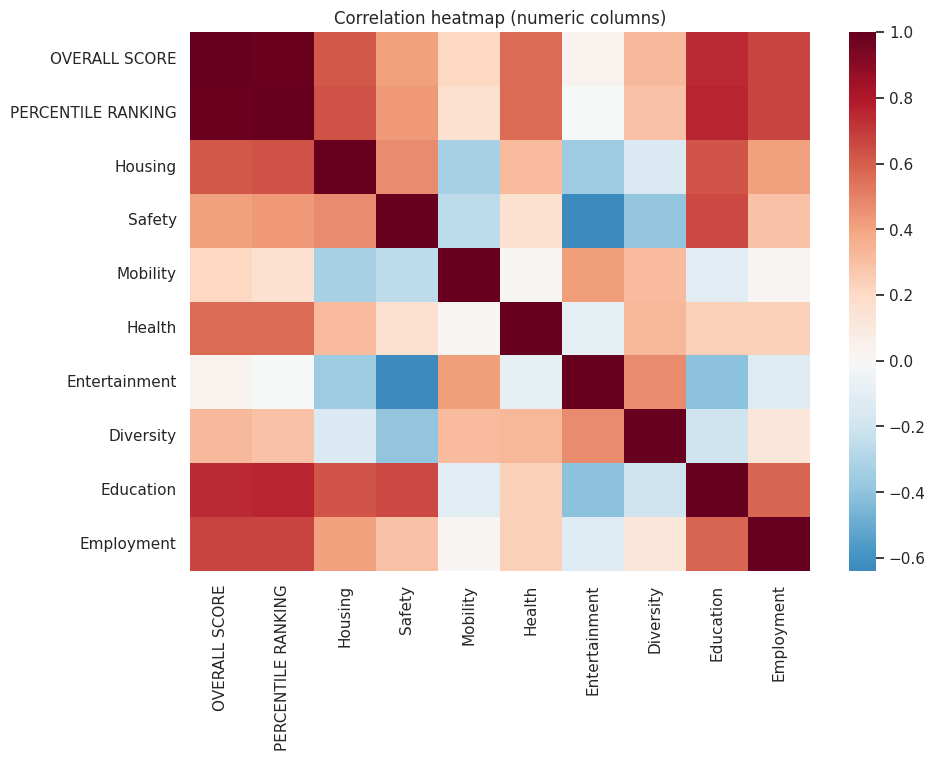


Correlation with OVERALL SCORE:
 PERCENTILE RANKING    0.984065
Education             0.744453
Employment            0.670939
Housing               0.621722
Health                0.565556
Safety                0.408740
Diversity             0.323185
Mobility              0.205756
Entertainment         0.045089
Name: OVERALL SCORE, dtype: float64


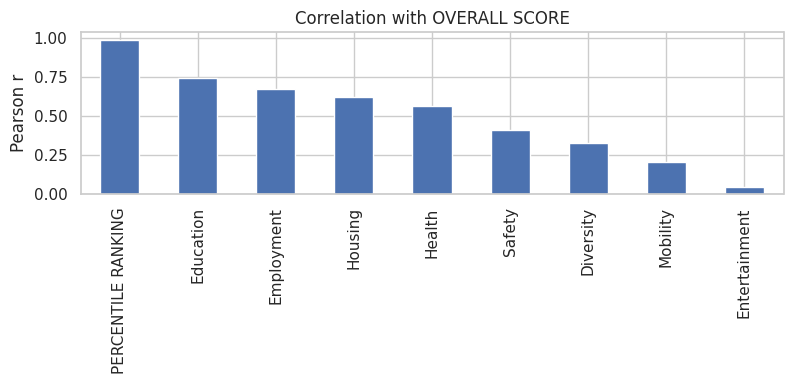


R2: 0.9998464296885662
MAE: 0.009151658064775704

Coefficients (sorted by absolute value):
 Housing          0.181011
Education        0.179482
Employment       0.140963
Entertainment    0.130800
Mobility         0.110267
Health           0.099289
Safety           0.079973
Diversity        0.079766
dtype: float64


In [4]:
# --- 0) Setup ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

# If using Colab: upload the CSV from your computer
from google.colab import files
uploaded = files.upload()  # choose BostonCities.csv

# --- 1) Load data ---
path = next(iter(uploaded))  # filename you uploaded
df = pd.read_csv(path)

# --- 2) Quick audit ---
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print("\nDtypes:\n", df.dtypes)
print("\nMissing values:\n", df.isna().sum())

# Duplicates check
if 'City' in df.columns:
    print("\nDuplicate cities:", df['City'].duplicated().sum())

# --- 3) Descriptive stats ---
num = df.select_dtypes(include='number')
print("\nNumeric summary:\n", num.describe().T)

# Top / bottom cities by overall score
if 'OVERALL SCORE' in df.columns:
    display(df.sort_values('OVERALL SCORE', ascending=False).head(10))
    display(df.sort_values('OVERALL SCORE', ascending=True).head(10))

# --- 4) Correlation / drivers ---
plt.figure(figsize=(10, 7))
sns.heatmap(num.corr(), cmap='RdBu_r', center=0)
plt.title("Correlation heatmap (numeric columns)")
plt.show()

# Correlations with OVERALL SCORE (exclude itself)
if 'OVERALL SCORE' in num.columns:
    corr = num.corr(numeric_only=True)['OVERALL SCORE'].drop('OVERALL SCORE').sort_values(ascending=False)
    print("\nCorrelation with OVERALL SCORE:\n", corr)

    plt.figure(figsize=(8, 4))
    corr.plot(kind='bar')
    plt.title("Correlation with OVERALL SCORE")
    plt.ylabel("Pearson r")
    plt.tight_layout()
    plt.show()

# --- 5) Simple regression (optional) ---
# Note: PERCENTILE RANKING may be derived from OVERALL SCORE; exclude it to avoid leakage.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

features = [c for c in num.columns if c not in ['OVERALL SCORE', 'PERCENTILE RANKING']]
X = df[features]
y = df['OVERALL SCORE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

pred = model.predict(X_test)
print("\nR2:", r2_score(y_test, pred))
print("MAE:", mean_absolute_error(y_test, pred))

coef = pd.Series(model.coef_, index=features).sort_values(key=np.abs, ascending=False)
print("\nCoefficients (sorted by absolute value):\n", coef)
